# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     810.5
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           8.27e-40
Time:                        09:37:20   Log-Likelihood:                -3.9248
No. Observations:                  50   AIC:                             15.85
Df Residuals:                      46   BIC:                             23.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8551      0.093     52.202      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.29277511  4.84426736  5.34771803  5.76924197  6.08718298  6.29567191
  6.40559091  6.44278556  6.44381847  6.44996218  6.50041819  6.62587626
  6.84347217  7.15397238  7.54164805  7.9768593   8.42092495  8.83247768
  9.17426064  9.41924857  9.55508802  9.58612699  9.53270052  9.42778975
  9.3116032   9.2249706   9.20263471  9.26754316  9.42707824  9.67184399
  9.97720996 10.30735788 10.62116654 10.87896787 11.04906428 11.11293652
 11.06828631 10.92941394 10.72486879 10.49275875 10.27448918 10.10796014
 10.02133951 10.02843511 10.12642607 10.29632635 10.50610404 10.71594413
 10.88479002 10.97708898]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.95160495 10.76312923 10.43604474 10.02591709  9.60589019  9.24877801
  9.00923727  8.91038549  8.93814107  9.04467091]


## Plot comparison

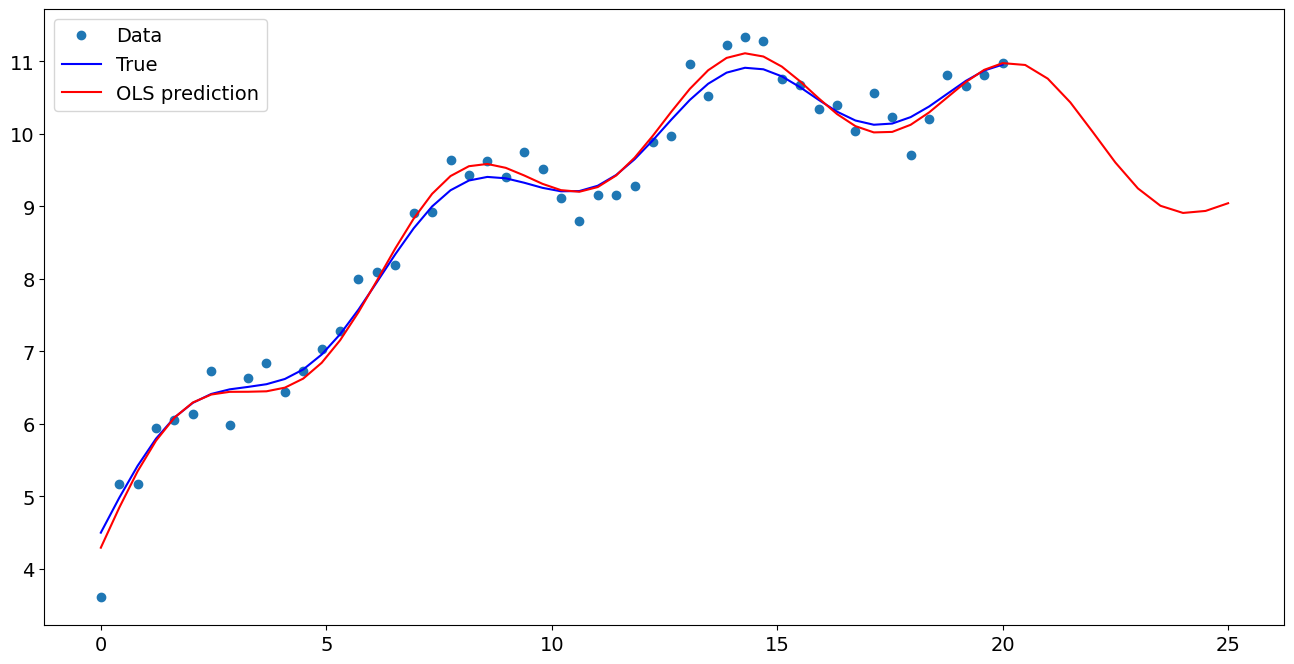

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.855109
x1                  0.530768
np.sin(x1)          0.621756
I((x1 - 5) ** 2)   -0.022493
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.951605
1    10.763129
2    10.436045
3    10.025917
4     9.605890
5     9.248778
6     9.009237
7     8.910385
8     8.938141
9     9.044671
dtype: float64